In [1]:
# Improve by ChatGPT & GitHub Copilot
# Running the requierements.ipynb
%run /bettik/PROJECTS/pr-data-ocean/riverama/Notebooks/OSSE_generator/requierements.ipynb

In [2]:
GEBCO = xr.open_mfdataset("/bettik/PROJECTS/pr-data-ocean/riverama/Datos/GEBCO_05_Mar_2024_5ebc668e5818/gebco_2023_n-16.0_s-28.0_w160.0_e172.0.nc")

In [3]:
GEBCO

<xarray.Dataset> Size: 17MB
Dimensions:    (lat: 2880, lon: 2880)
Coordinates:
  * lat        (lat) float64 23kB -28.0 -27.99 -27.99 ... -16.01 -16.01 -16.0
  * lon        (lon) float64 23kB 160.0 160.0 160.0 160.0 ... 172.0 172.0 172.0
Data variables:
    elevation  (lat, lon) int16 17MB dask.array<chunksize=(2880, 2880), meta=np.ndarray>
Attributes: (12/36)
    title:                           The GEBCO_2023 Grid - a continuous terra...
    summary:                         The GEBCO_2023 Grid is a continuous, glo...
    keywords:                        BATHYMETRY/SEAFLOOR TOPOGRAPHY, DIGITAL ...
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              DOI: 10.5285/f98b053b-0cbc-6c23-e053-6c8...
    naming_authority:                https://dx.doi.org
    ...                              ...
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  1.0
    geospatial_vertical_positive:    up
    identifier_product_doi:          DOI: 10.5285/f98b053b-0cbc-6c23-e053-6c8...
    references:                      DOI: 10.5285/f98b053b-0cbc-6c23-e053-6c8...
    node_offset:                     1.0

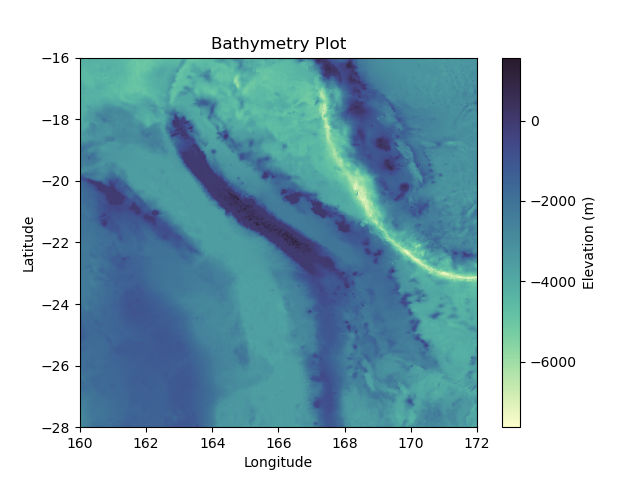

In [5]:
# Extract bathymetry (elevation) data
bathymetry = GEBCO['elevation']

# Create a gradient plot of bathymetry
plt.figure()
plt.pcolormesh(bathymetry.lon, bathymetry.lat, bathymetry, shading='auto', cmap=cmocean.cm.deep)
plt.colorbar(label='Elevation (m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bathymetry Plot')
plt.show()

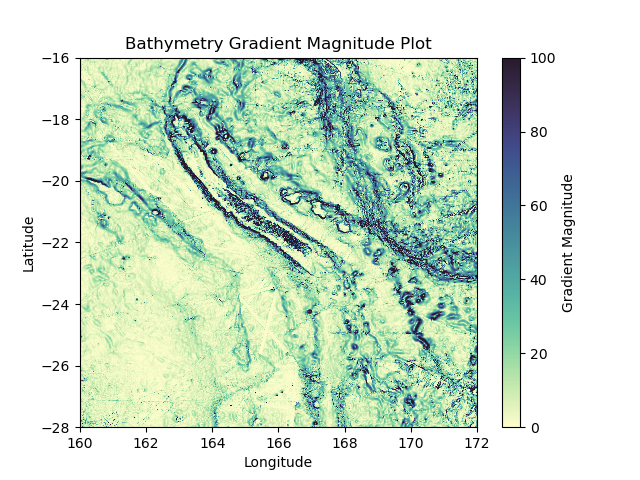

In [6]:
# Calculate the gradients along the latitude and longitude
grad_lat, grad_lon = np.gradient(bathymetry)

# Calculate the magnitude of the gradient
grad_magnitude = np.sqrt(grad_lat**2 + grad_lon**2)

# Determine the min and max values of the gradient magnitude
vmin = np.min(grad_magnitude)
vmax = 100

# Plot the gradient magnitude with specified vmin and vmax
plt.figure()
plt.pcolormesh(GEBCO['lon'], GEBCO['lat'], grad_magnitude, shading='auto', cmap=cmocean.cm.deep, vmin=vmin, vmax=vmax)
plt.colorbar(label='Gradient Magnitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bathymetry Gradient Magnitude Plot')
plt.show()